<a href="https://colab.research.google.com/github/Yugsolanki/ML-SC-Lab/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
!kaggle datasets download -d lowecoryr/universalbank

Dataset URL: https://www.kaggle.com/datasets/lowecoryr/universalbank
License(s): unknown
  0% 0.00/59.9k [00:00<?, ?B/s]
100% 59.9k/59.9k [00:00<00:00, 42.4MB/s]


In [3]:
!unzip /content/universalbank.zip

Archive:  /content/universalbank.zip
  inflating: UniversalBank (1).csv   


In [4]:
data = pd.read_csv("/content/UniversalBank (1).csv")

# Exploring Data

In [5]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
data.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIP Code,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal Loan,0


# Dropping uncessary columns

In [9]:
data = data.drop(["ID","ZIP Code"], axis = 1)

In [10]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


# Data Visualization

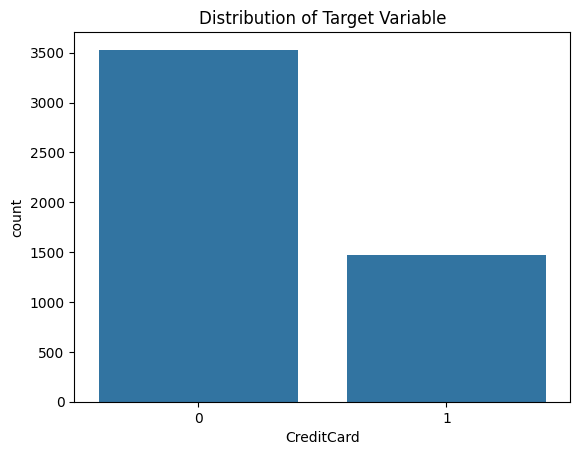

In [11]:
sns.countplot(x='CreditCard', data=data)
plt.title('Distribution of Target Variable')
plt.show()

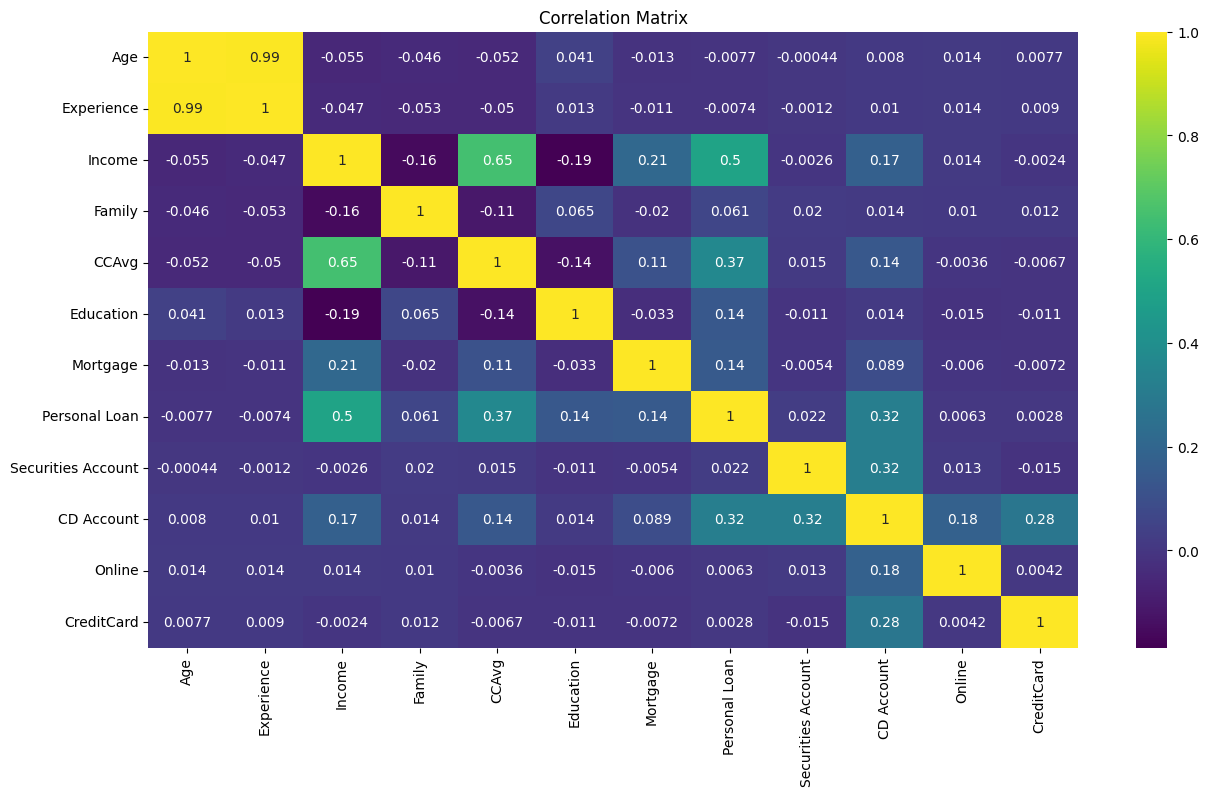

In [12]:
corr_matrix = data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

# Data Preprocessing

In [13]:
X = data.drop('CreditCard', axis=1)
y = data['CreditCard']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (4000, 11)
X_test:  (1000, 11)
y_train:  (4000,)
y_test:  (1000,)


In [16]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM Model Training

In [17]:
# Create SVM model
# You can experiment with different kernels (e.g., 'rbf', 'poly')
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
svm_model.intercept_

array([-0.880023])

In [22]:
svm_model.coef_

array([[ 5.56369067e-04, -5.85416737e-04,  6.33844113e-05,
        -7.65258015e-07, -1.68367192e-05, -3.20553303e-05,
         1.06330687e-05, -3.36366338e-05, -5.25708214e-05,
         4.74989892e-01, -4.70379932e-05]])

# Model Evaluation

In [18]:
# Make predictions on the testing set
y_pred = svm_model.predict(X_test)

In [19]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

In [20]:
print('Accuracy:', accuracy)
print('Classification Report:\n', classification_rep)
print('Confusion Matrix:\n', confusion_mat)

Accuracy: 0.752
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.99      0.85       708
           1       0.85      0.18      0.30       292

    accuracy                           0.75      1000
   macro avg       0.80      0.58      0.57      1000
weighted avg       0.78      0.75      0.69      1000

Confusion Matrix:
 [[699   9]
 [239  53]]
